## Exemple 3
### Transmissòmetre

[Coleman 2018](#bib_Coleman)

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
n = 50

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

### Mesura de concentració de partícules

Un fabricant ha desenvolupat un sistema de mesura de la concentració de partícules sòlides emeses pels motors de combustió.

El sistema es basa en el fet que la transmissivitat de la llum en travessar un medi amb partícules en suspensió depèn de la concentració de partícules, la distància que la llum travessa i el coeficient d'extinció.

$$T = \frac{I}{I_0} = e^{- CEL}$$

- El fabricant especifica que la transmissivitat té una incertesa de l'1%
- La distància recorreguda pel làser també s'ha mesurat amb una precisió de l'1%
- Amb quina precisió hem de mesurar el coeficient d'extinció per tindre una incertesa menor del $5\%$ en la mesura de la concentració de partícules?
- I si volem saber-ho amb un nivell de confiança del $95\%$?

In [2]:
# Concentració de partícules
from sympy.abc import T, E, L

C = - sp.log(T) / (E * L)
show("C =", C)

<IPython.core.display.Math object>

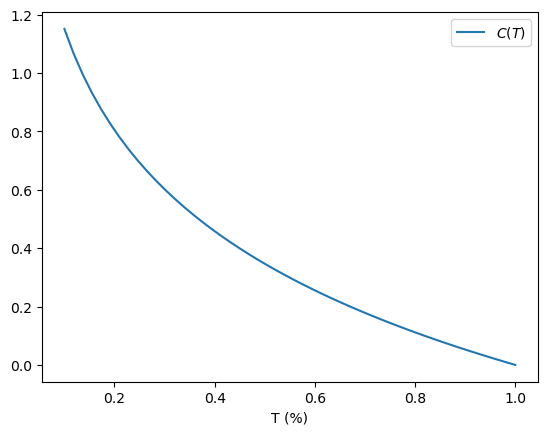

In [3]:
valors = {E: 0.5, L: 4}
x = np.linspace(0.1, 1, 50)
fC = sp.lambdify(T, C.subs(valors), "numpy")

c = fC(x)

fig, ax = plt.subplots()

#ax.semilogy(x, c)
ax.plot(x, c)
ax.legend(['$C(T)$'])
l = ax.set_xlabel('T (%)')

In [4]:
# Coeficients de sensitivitat
CT = T / C * sp.diff(C, T)
#CA = sp.cancel(sp.expand(CT))
CE = E / C * sp.diff(C, E)
CL = L / C * sp.diff(C, L)
show(CT, qq, CE, qq, CL)

<IPython.core.display.Math object>

In [5]:
# Incertesa relativa de C
# Assumint que les incerteses de T, E i L són independents
urE = sp.symbols('ur_E')

CurE = CE * urE
CurL = CL * 0.01
CurT = CT * 0.01

urC2 = CurE**2 + CurL**2 + CurT**2
show("ur^2_C=", urC2)

<IPython.core.display.Math object>

<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in divide
  return (0.100498756211209*sqrt(1 + 0.0099009900990099/log(T)**2))


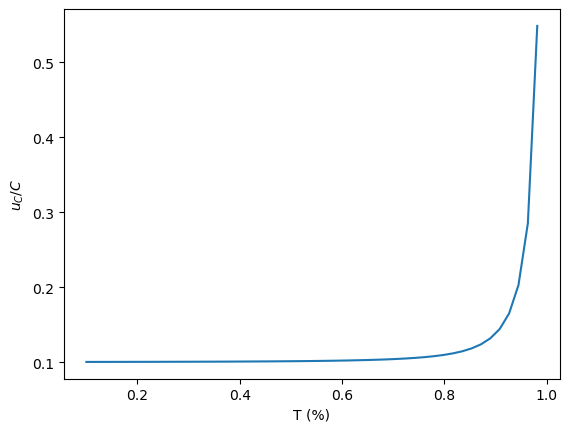

In [6]:
# Ur_C per una incertesa relativa de E del 10%
x = np.linspace(0.1, 1.0, 50)
furC = sp.lambdify(T, sp.sqrt(urC2).subs(valors).subs(urE, 0.1), "numpy")

urc = furC(x)

plt.plot(x, urc)
plt.xlabel('T (%)')
plt.ylabel('$u_C/C$')
plt.show()

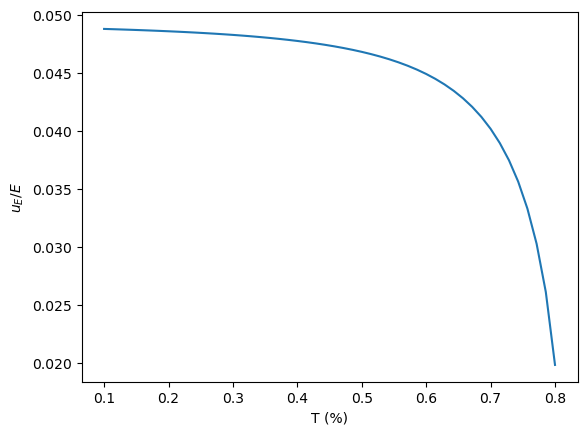

In [7]:
# Incertesa relativa de E perquè U_C/C sigui del 5%
urE2 = sp.solve(sp.Eq(urC2, 0.05 * 0.05), urE**2)[0]

x = np.linspace(0.1, 0.8, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

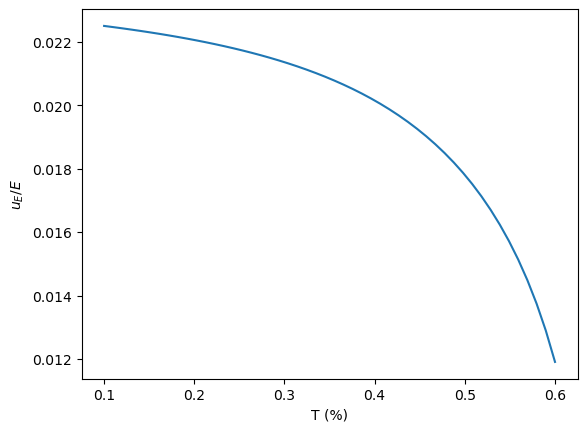

In [8]:
# Incertesa de E perquè U_C/C sigui del 5% amb un nivell de confiança del 95%
# Assumint suficient estadística per a tindre t(95%) = 2

urE2 = sp.solve(sp.Eq(urC2, (0.05 / 2)**2), urE**2)[0]

x = np.linspace(0.1, 0.6, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

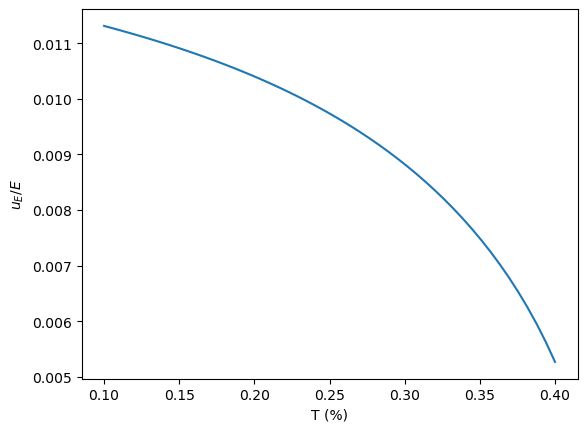

<IPython.core.display.Math object>

In [9]:
# Incertesa de E perquè U_C/C sigui del 5% amb un nivell de confiança del 95%
# En el cas que només tenim 4 mesures independents

t = stats.t.interval(confidence=0.95, df=(4 - 1))
urE2 = sp.solve(sp.Eq(urC2, (0.05 / t[1])**2), urE**2)[0]

x = np.linspace(0.1, 0.4, 50)
furE = sp.lambdify(T, sp.sqrt(urE2).subs(valors), "numpy")

ure = furE(x)

plt.plot(x, ure)
plt.xlabel('T (%)')
plt.ylabel('$u_E/E$')
plt.show()

show("t_{95\%}(4) = ", t[1])

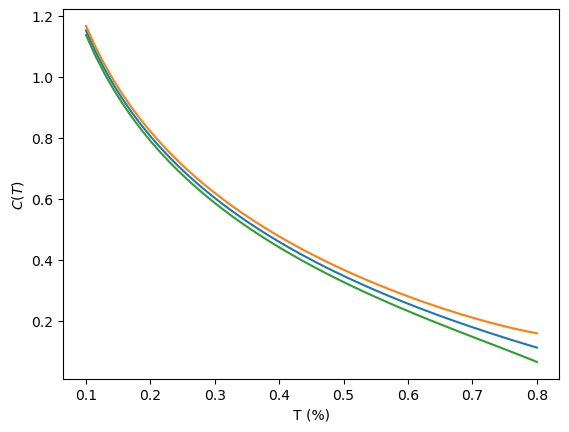

In [10]:
# Corba de C per a ur_E del 1%
x = np.linspace(0.1, 0.8, 50)
fC = sp.lambdify(T, C.subs(valors), "numpy")
fuC = sp.lambdify(T, sp.sqrt(urC2.subs(valors).subs({urE: 0.01})), "numpy")

c = fC(x)
cp = c + fuC(x)
cm = c - fuC(x)

fig, ax = plt.subplots()

ax.plot(x, c, x, cp, x, cm)
ax.set_ylabel('$C(T)$')
l = ax.set_xlabel('T (%)')

# Referències

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='bib_Coleman'></a> Coleman, Hugh W. & Steele, W. Glenn, **2018**. *Experimentation, validation, and uncertainty analysis for engineers*. Wiley. # Example 4-4

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: static/gfdl-logo-small.png
[GPL3]: static/gplv3-127x51.png